# Spanish Wine Quality

1. Source: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

2. A list of 7000+ wines that describe their price, rating, and even some flavor description.

3. Rating

4. A product produced by a single winery, in a certain year.

5. Classification

6. 11

7. 7500

8. Wine and type may be hard to deal with.

Attribute Information
1. winery: Winery name
2. wine: Name of the wine
3. year: Year in which the grapes were harvested
4. rating: Average rating given to the wine by the users [from 1-5]
5. num_reviews: Number of users that reviewed the wine
6. country: Country of origin [Spain]
7. region: Region of the wine
8. price: Price in euros [€]
9. type: Wine variety
10. body: Body score, defined as the richness and weight of the wine in your of the wine in your mouth [from 1-5]
11. acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/Project-2/imports/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
#Describe
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


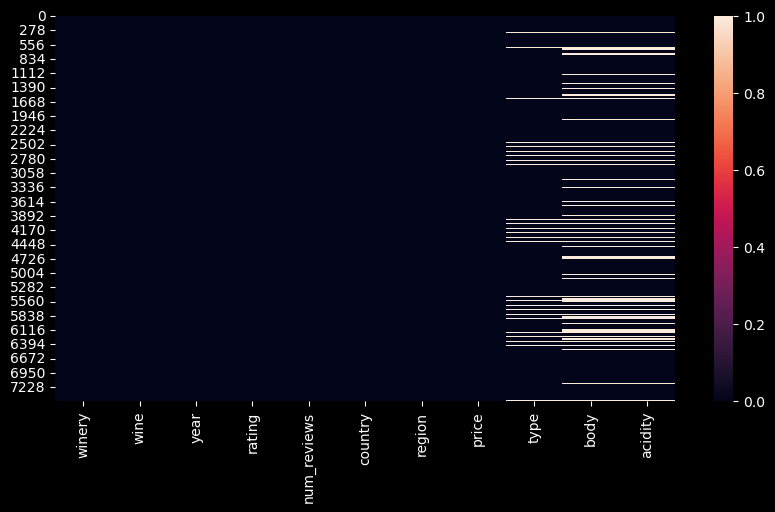

In [5]:
#Visual for missing values
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.heatmap(df.isna());

In [6]:
#Percentages of missing values.
percent_missing=df.isna().sum()*100/len(df)
print(percent_missing)

winery          0.000000
wine            0.000000
year            0.026667
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            7.266667
body           15.586667
acidity        15.586667
dtype: float64


In [7]:
#Creating a copy for exploratory data analysis and machine learning
ml_df=df.copy()
eda_df=df.copy()

#Data Cleaning

*   Some steps will only be performed on the eda_df copy as to prevent data leakage for the ml_df copy.





In [8]:
#Drop Duplicate rows
ml_df.drop_duplicates()
eda_df.drop_duplicates()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00,Rioja Red,4.0,3.0


In [9]:
#NaN Values
eda_df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [10]:
#Country is all 1.
eda_df['country'].value_counts()

Espana    7500
Name: country, dtype: int64

In [11]:
#dropping as this info is not needed for our exploration of the data.
ml_df.drop(columns='country',inplace=True)
eda_df.drop(columns='country',inplace=True)

In [12]:
#Year has missing values and is listed as an object. Setting max rows to find errors.
pd.set_option('display.max_rows',None)
eda_df['year'].value_counts()

2011    1190
2016     897
2015     860
2018     850
2017     731
2012     528
2020     474
2014     376
2019     331
N.V.     288
2004     254
2005     198
2010      74
2013      66
2009      46
2007      38
2006      32
2008      30
2001      21
2000      18
1994      13
1995      13
2003      13
1998      12
2002      12
1996      11
1999      10
1982       8
1964       7
1989       7
1985       7
2021       6
1987       6
1986       6
1968       5
1970       5
1981       4
1997       3
1991       3
1973       3
1955       2
1965       2
1959       2
1980       2
1983       2
1988       2
1975       2
1962       2
1990       2
1979       2
1946       2
1951       1
1928       1
1929       1
1976       1
1949       1
1922       1
1978       1
1969       1
1942       1
1954       1
1961       1
1910       1
1967       1
1992       1
1958       1
1953       1
1972       1
1974       1
1931       1
1925       1
Name: year, dtype: int64

In [13]:
#Replacing N.V. with NaN, dropping them, converting year to int
eda_df['year']=eda_df['year'].replace('N.V.',np.nan)
eda_df=eda_df.dropna(subset=['year'])
eda_df['year']=eda_df['year'].astype('int64')

#ML copy
ml_df['year']=ml_df['year'].replace('N.V.',np.nan)
ml_df=ml_df.dropna(subset=['year'])
ml_df['year']=ml_df['year'].astype('int64')

In [14]:
pd.set_option('display.max_rows',10)

In [15]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7210 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7210 non-null   object 
 1   wine         7210 non-null   object 
 2   year         7210 non-null   int64  
 3   rating       7210 non-null   float64
 4   num_reviews  7210 non-null   int64  
 5   region       7210 non-null   object 
 6   price        7210 non-null   float64
 7   type         6672 non-null   object 
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 619.6+ KB


In [16]:
eda_df.isna().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
region            0
price             0
type            538
body           1140
acidity        1140
dtype: int64

In [17]:
#Filling NaN values for body, acidity, and type. Using median for this just for data exploration
eda_df['body']=eda_df['body'].fillna(eda_df.groupby('rating')['body'].transform('median'))
eda_df['acidity']=eda_df['acidity'].fillna(eda_df.groupby('rating')['acidity'].transform('median'))
eda_df['type']=eda_df['type'].fillna(df['type'].mode())

In [18]:
eda_df['type'].value_counts()

Rioja Red               2357
Ribera Del Duero Red    1406
Red                      863
Priorat Red              674
Toro Red                 296
                        ... 
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Sherry                     2
Name: type, Length: 21, dtype: int64

In [19]:
cat_col=eda_df.select_dtypes(['object']).columns

In [20]:
cat_col

Index(['winery', 'wine', 'region', 'type'], dtype='object')

In [21]:
for column in cat_col:
    value_counts=eda_df[column].value_counts()
    print(value_counts)

Contino                 457
Artadi                  261
La Rioja Alta           254
Sierra Cantabria        237
Matarromera             232
                       ... 
Uvaguilera Aguilera       1
Fernandez de Pierola      1
De Muller                 1
Monteabellon              1
Martinez Lacuesta         1
Name: winery, Length: 445, dtype: int64
Reserva                              467
Gran Reserva                         458
Rioja Reserva                        240
El Viejo                             224
Corimbo I                            223
                                    ... 
La Baraja                              1
Magico                                 1
Mas del Serral                         1
Vina Tondonia Gran Reserva Blanco      1
Valdafoz Bierzo (Corullon)             1
Name: wine, Length: 777, dtype: int64
Rioja                2440
Ribera del Duero     1412
Priorato              686
Toro                  300
Vino de Espana        261
                     ... 
Terra A

In [22]:
totalrows=len(eda_df)
for column in cat_col:
    value_counts=eda_df[column].value_counts()
    percent=value_counts/totalrows
    badcats=percent[percent < 0.03].index
    print(badcats)

Index(['Vinedos de Paganos', 'Vega Sicilia', 'Remirez de Ganuza',
       'Alvaro Palacios', 'Marques de Murrieta', 'Dominio de Pingus',
       'Martinet', 'Abadia Retuerta', 'Emilio Moro', 'Vina Sastre',
       ...
       'Vins Miquel Gelabert', 'El Grillo y La Luna', 'Altos del Terral',
       'Jean Leon', 'Bodegas Ateca', 'Uvaguilera Aguilera',
       'Fernandez de Pierola', 'De Muller', 'Monteabellon',
       'Martinez Lacuesta'],
      dtype='object', length=423)
Index(['El Puntido', 'Rioja Blanco', 'Tinto', 'Unico', 'Valbuena 5o',
       'Priorat', 'Ribera del Duero', 'Unico Reserva Especial Edicion',
       'Rioja Gran Reserva', 'L'Ermita Velles Vinyes Priorat',
       ...
       'Seleccion La Aguilera', 'Don PX Vieja Cosecha',
       'Alenza Ribera del Duero Gran Reserva', 'Ribas de Cabrera', 'Cenit',
       'La Baraja', 'Magico', 'Mas del Serral',
       'Vina Tondonia Gran Reserva Blanco', 'Valdafoz Bierzo (Corullon)'],
      dtype='object', length=756)
Index(['Castilla y Leon

In [23]:
targets = ['winery','wine','region','type']

for column in cat_col:
    value_counts=eda_df[column].value_counts()
    badcats= percent[percent < 0.03].index

In [24]:
mask=eda_df[cat_col].apply(lambda x: x.map(lambda category: category not in badcats)).all(axis=1)
eda_df=eda_df[mask]

In [25]:
for column in cat_col:
    value_counts=eda_df[column].value_counts()
    print(value_counts)

Contino                   457
Artadi                    261
La Rioja Alta             254
Sierra Cantabria          237
Matarromera               232
                         ... 
Valdelosfrailes             1
Briego                      1
Bodegas Asenjo & Manso      1
Condado de Haza             1
Can Axartell                1
Name: winery, Length: 394, dtype: int64
Reserva                       467
Gran Reserva                  458
Rioja Reserva                 240
El Viejo                      224
Corimbo I                     223
                             ... 
Rioja Vina Coqueta              1
Territorio Luthier Reserva      1
Finca Martelo                   1
Seleccion La Aguilera           1
El Cristo de Samaniego          1
Name: wine, Length: 641, dtype: int64
Rioja                              2345
Ribera del Duero                   1411
Priorato                            686
Toro                                299
Vino de Espana                      258
                  

#Exploritory data analysis visualizations

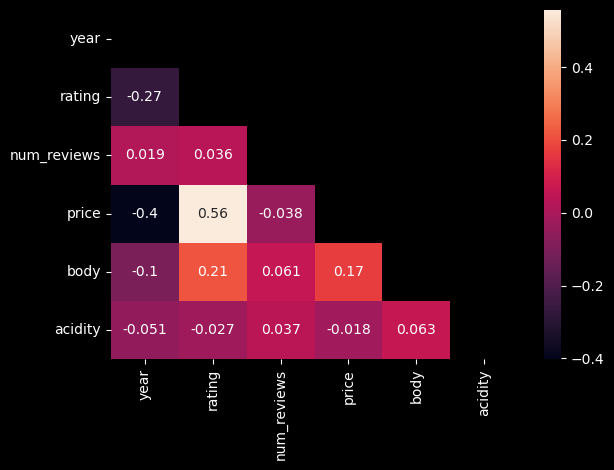

In [26]:
#Heatmap
corr=eda_df.corr()
plt.style.use('dark_background')
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask)
plt.tight_layout();

# Insights from heatmap we can see a few different things.
## Positive Correlations
* Rating and Price show a positive correlation of .54.
* Rating and Body show .17
* Price and Body show .16

## Negative Correlations
* Year and Price have a negative correlation of -.39
* Year and Rating have a negative correlation of -.3

### From these insights we can see that price is directly effected by a wine's rating.
### As well as Rating has a good correlation to the body of the wine.


# Exploratory Data Analysis

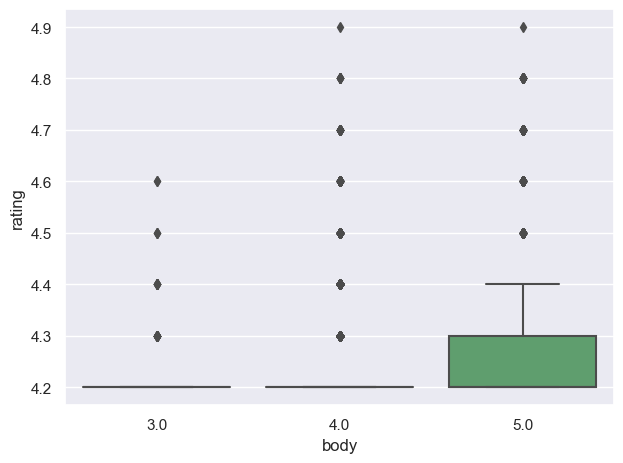

In [27]:
sns.set(style='darkgrid')
ax=sns.boxplot(data=eda_df,x='body',y='rating')
plt.tight_layout();

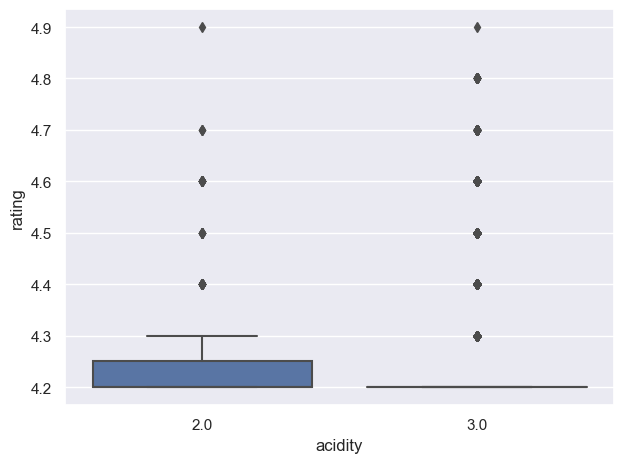

In [28]:
sns.set(style='darkgrid')
ax=sns.boxplot(data=eda_df,x='acidity',y='rating')
plt.tight_layout();

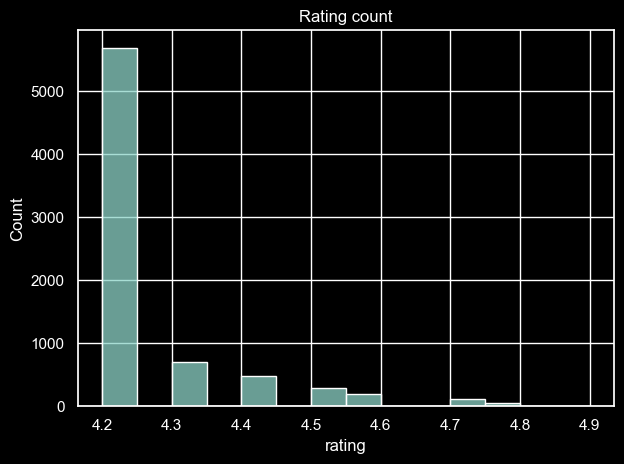

In [29]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
ax=sns.histplot(df['rating'])
ax.set_title('Rating count')
plt.tight_layout();

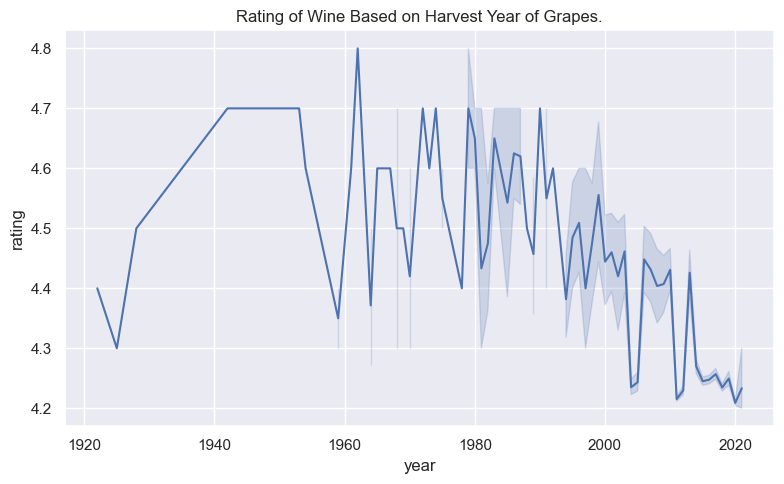

In [30]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
ax=sns.lineplot(data=eda_df,x='year',y='rating')
ax.set_title('Rating of Wine Based on Harvest Year of Grapes.')
plt.tight_layout();

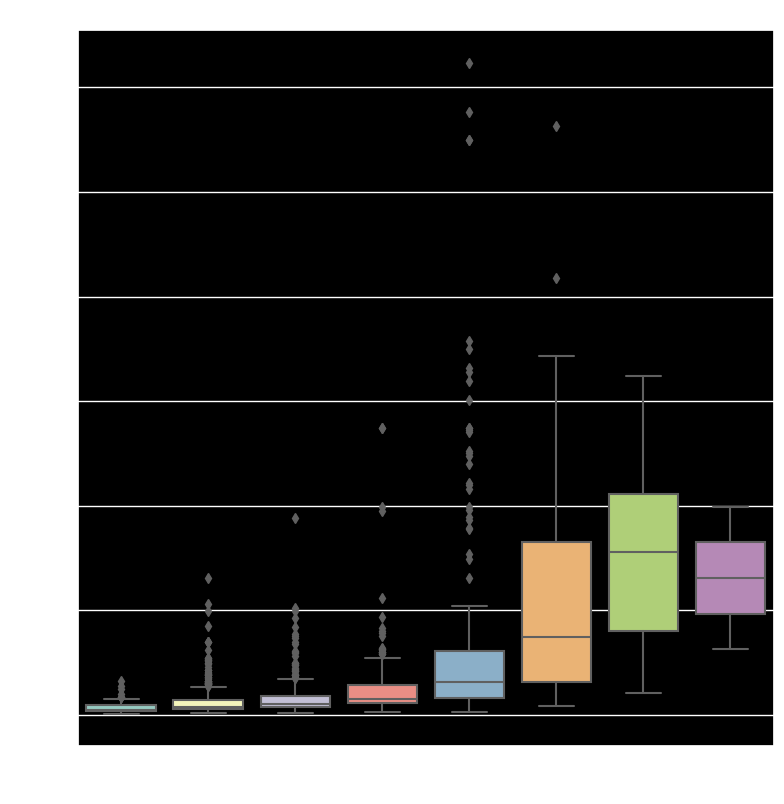

In [31]:
plt.figure(figsize=(8,8))
sns.set(style='darkgrid')
plt.style.use('dark_background')
ax=sns.boxplot(data=eda_df,x='rating',y='price',orient="v")
plt.tight_layout()
ax.set_title('Rating and Price');

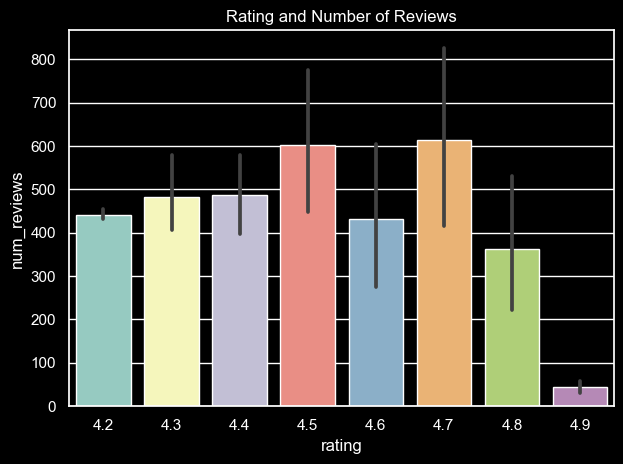

In [32]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
ax=sns.barplot(data=eda_df,x='rating',y='num_reviews')
ax.set_title('Rating and Number of Reviews')
plt.tight_layout();

#Outliers May Include

*   Acidity
*   Body
*   Number of Reviews
*   Price



# Key Trends

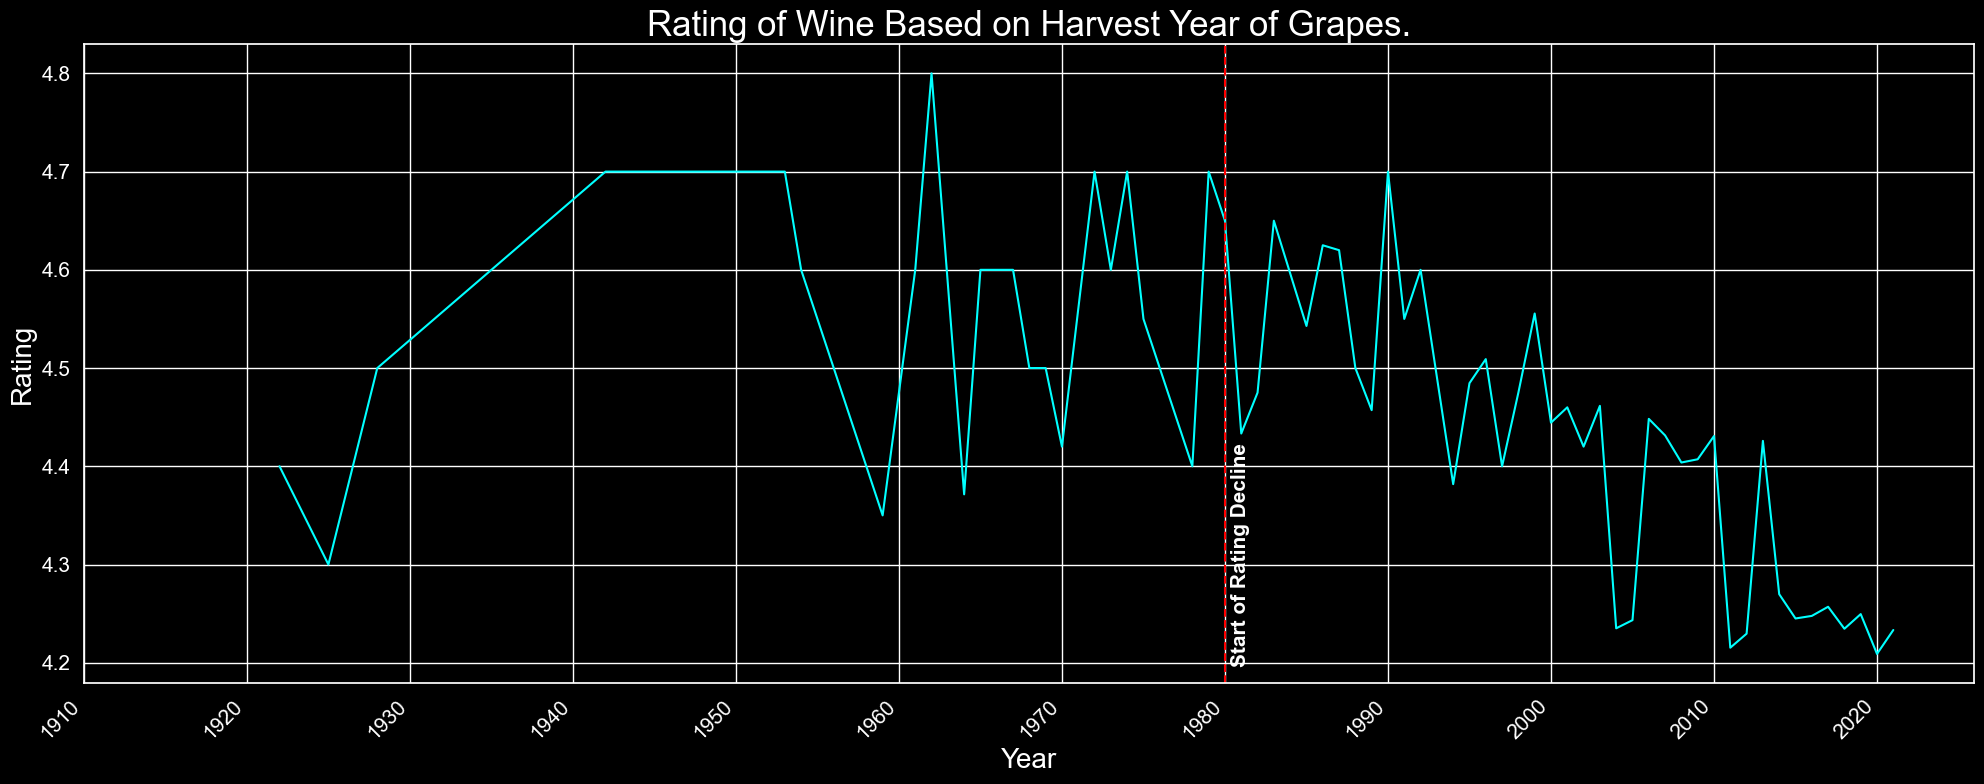

In [33]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.style.use('dark_background')
ax=sns.lineplot(data=eda_df,y='rating',x='year',ci=None,color='cyan')
ax.set_title('Rating of Wine Based on Harvest Year of Grapes.',fontsize=25)
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Rating',fontsize=20)
ax.set_xticks((1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
ax.axvline(x = 1980,ymin = 0,ymax = 1,color='red',ls='--')
plt.text(1980.4,4.2,'Start of Rating Decline',rotation=90,fontsize=15,fontweight='bold')
plt.tight_layout();

### Above Lineplot shows the drop in rating based on the year grapes were harvested. A significant decline can be seen where the red line is, besides some outliers, I assume that this shows the quality of grape harvests falling off starting in 1980.

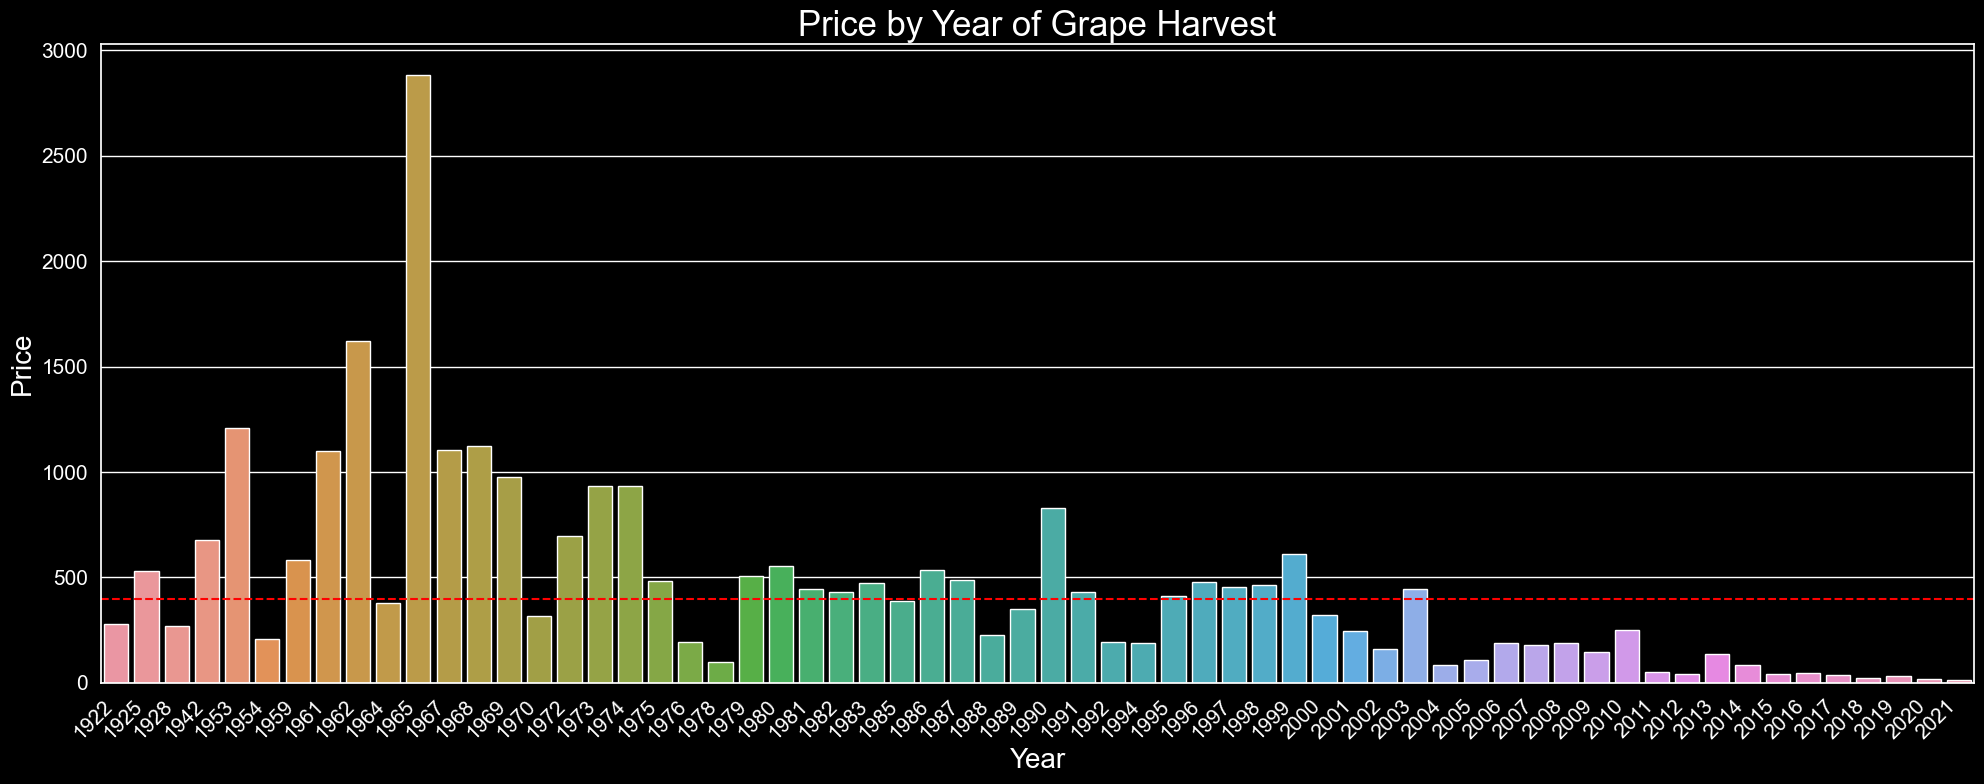

In [34]:
plt.figure(figsize=(20,8))
plt.style.use('dark_background')
ax=sns.barplot(data=eda_df,x='year',y='price',ci=None)
ax.set_title('Price by Year of Grape Harvest',fontsize=25)
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
ax.axhline(y=400,color='red',ls='--')
plt.tight_layout();

### The above bar plot shows that after the year 2004, almost no wine produced sold for over 400. This bit of information seems useful as it may be a grape quality issue, as discussed in our other trend of rating by year of the grape harvest.